<a href="https://colab.research.google.com/github/NgocPhungggg/CUT/blob/Elements_of_Artificial_Intelligence/Lab_01/Numerical_Integration_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phung Cao Thi Ngoc is testing the google colab & github

Numerical Integration
---------------------

Here is an introduction to Numerical Integration with Python!

Let's look at a simple function:

\begin{align}g(x) = x^2+x^3\end{align}

which we know the analytical integral as:

\begin{align}G(x) = - \frac{1}{3} x^3 + \frac{1}{4} x^4\end{align}

and let's integrate that from m to M using p points. Compare it with analytical result.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

# Initial function given
def f(x):
    y = x**2 + x**3
    return y


# Definite integral of the function from a to b
def F(a,b):
    if a > b:
        raise ValueError('b must be greater than a')
    elif a == b:
        return 0
    else:
        y = (b**3-a**3)/3 + (b**4-a**4)/4
        return y


In [2]:

# Approximating function using numerical methods:
    # rectangular
    # trapezoidal
def approximateNumerical(a,b,points=10,error=False,mod='rectangular',plt_data=False):
    if points < 2:
        raise ValueError('Number of points must be greater than 2')
    if a == b:
        return 0
    n = np.linspace(a,b,points)
    partialSum = 0
    if mod == 'rectangular':
        def miniArea(c,d):
            return (d-c)*f((c+d)/2)
    elif mod == 'trapezoidal':
        def miniArea(c,d):
            return (d-c)*(f(c)+f(d))/2
    else:
        raise ValueError('Method '+mod+' unknown')

    for i in range(1,len(n)):
        partialSum += miniArea(n[i-1],n[i])
    e = (partialSum-F(a,b))/F(a,b) *100
    if error:
        print('\nApproximating using '+ mod+' rule...')
        print('Percentage error: ',e,'%')

    if plt_data:
        plot_dat(a,b,points,mod=mod)

    return partialSum,e

In [3]:
# Plotting function for a visual representation
def plot_dat(a,b,points,mod='rectangular'):

    n = np.linspace(a,b,points)
    plt.plot(n,f(n),color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Numerical approximation: '+mod)
    if mod == 'rectangular':
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([c,c],[0,f((c+d)/2)],color='blue')
            plt.plot([d,d],[0,f(d)],color='blue')
            plt.plot([c,d],[f((c+d)/2),f((c+d)/2)],color='blue')
        plt.show()
    if mod == 'trapezoidal':
        for i in range(1,len(n)):
            c = n[i-1]
            d = n[i]
            plt.plot([d,d],[0,f(d)],color='blue')
            plt.plot([c,c],[0,f(c)],color='blue')
            plt.plot([c,d],[f(c),f(d)],color='blue')
        plt.show()
    return 0


In [4]:
# Approximate area with a given precision
def approxGivenPrecision(a,b,error=0.5,mod='rectangular',printf=False):
    e = 100
    p = 5
    itMax = 500
    it = 0
    while abs(e) > error:
        area,e = approximateNumerical(a,b,mod=mod,points=p)
        p += 10
        it += 1
        if printf:
            print('Approximating using '+mod+' rule with:',p,'points, percentage error:',e,'%')
        if it > itMax:
            print('Number of iterations exceeded: '+str(itMax))
            break
    return area

Actual area: 102864.58333333333

Approximating using rectangular rule...
Percentage error:  -0.020297449902204584 %


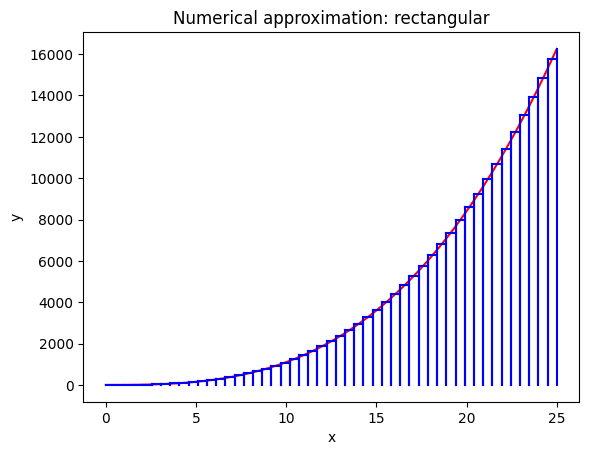

Approximation: (np.float64(102843.70444606413), np.float64(-0.020297449902204584))

Approximating using trapezoidal rule...
Percentage error:  0.04059489980440917 %


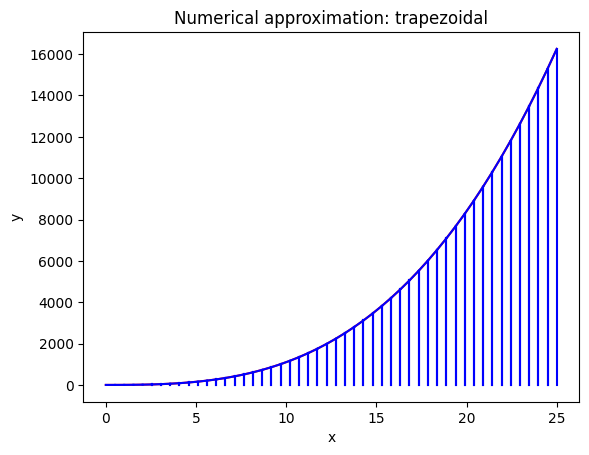

Approximation: (np.float64(102906.34110787172), np.float64(0.04059489980440917))
#############################################################
Approximating using rectangular rule with: 15 points, percentage error: -3.0458860759493627 %
Approximating using rectangular rule with: 25 points, percentage error: -0.2486437613019885 %
Approximating using rectangular rule with: 35 points, percentage error: -0.08460794655415171 %
Approximating using rectangular rule with: 45 points, percentage error: -0.04215759274669086 %
102821.21810121108
Approximating using trapezoidal rule with: 15 points, percentage error: 6.091772151898739 %
Approximating using trapezoidal rule with: 25 points, percentage error: 0.497287522603977 %
Approximating using trapezoidal rule with: 35 points, percentage error: 0.16921589310831756 %
Approximating using trapezoidal rule with: 45 points, percentage error: 0.08431518549339587 %
Approximating using trapezoidal rule with: 55 points, percentage error: 0.05034522439586

In [5]:


#-----------------------------Run the program----------------------------------

# Initial parameters:
    # xmin = m
    # xmax = M
    # points used = p

m = 0
M = 25
p = 50


print('Actual area:',F(m,M))
print('Approximation:',approximateNumerical(m,M,p,error=True,plt_data=True))
print('Approximation:',approximateNumerical(m,M,p,mod='trapezoidal',error=True,plt_data=True))
print('#############################################################')
print(approxGivenPrecision(m,M,error=0.05,printf=True))
print(approxGivenPrecision(m,M,error=0.05,mod='trapezoidal',printf=True))

# **Numerical integration with SCIPy library function**

In [6]:
import scipy.integrate as integrate

result = integrate.quad(lambda x: f(x), m, M)
print("Integration result: ",result[0],", error = ",result[1])

Integration result:  102864.58333333333 , error =  1.1420262883513979e-09
